In [1]:
from custom_utils import load_and_concatenate_parquet_files

df = load_and_concatenate_parquet_files('../data/big_fake_news_df')
display(df)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,None,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [2]:
df.info()
print("Null values per column:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Null values per column:


title    558
text      39
label      0
dtype: int64

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [4]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


label
real    0.510351
fake    0.489649
Name: proportion, dtype: float64

In [5]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342


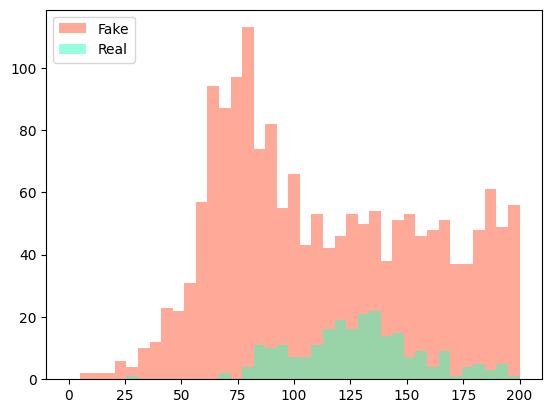

In [6]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

In [7]:
df.duplicated().sum()

8416

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(63121, 5)

In [9]:
df = df.sample(frac=1,random_state=42) 

In [10]:
display(df)

,title,text,label,title_text,body_len
71361,Donald Trump Responds To Mockery Over Fake Sw...,"Last night, at a rally in Melbourne, Florida, ...",1,Donald Trump Responds To Mockery Over Fake Sw...,3737
11496,Tweetwave,This time it's true no pantsTweetwave More Of ...,1,TweetwaveThis time it's true no pantsTweetwave...,23271
20292,Rubio says prospect of Trump president is 'wor...,(Reuters) - U.S. Senator Marco Rubio said on W...,0,Rubio says prospect of Trump president is 'wor...,516
38855,Trump lifts Cyber Command status to boost cybe...,WASHINGTON (Reuters) - President Donald Trump ...,0,Trump lifts Cyber Command status to boost cybe...,2470
20416,The 7 Biggest Republican Lies About The Econo...,"In two-and-a-half minutes, former U.S. Secreta...",1,The 7 Biggest Republican Lies About The Econo...,2626
...,...,...,...,...,...
71433,More than half of Britons now want to stay in ...,EDINBURGH (Reuters) - A poll has found that 51...,0,More than half of Britons now want to stay in ...,1167
41294,"Bill And Hillary Clinton, Inc.: For Sale At Th...","in: Special Interests , US News (image credit:...",1,"Bill And Hillary Clinton, Inc.: For Sale At Th...",2396
869,"Orlando Gunman Was Shot at Least 8 Times, Auto...",The authorities in Florida said Friday that Om...,0,"Orlando Gunman Was Shot at Least 8 Times, Auto...",2586
16332,The Lethal Gaps in How the Supreme Court Handl...,Seven of the 12 jurors who convicted Ronald B....,0,The Lethal Gaps in How the Supreme Court Handl...,4291


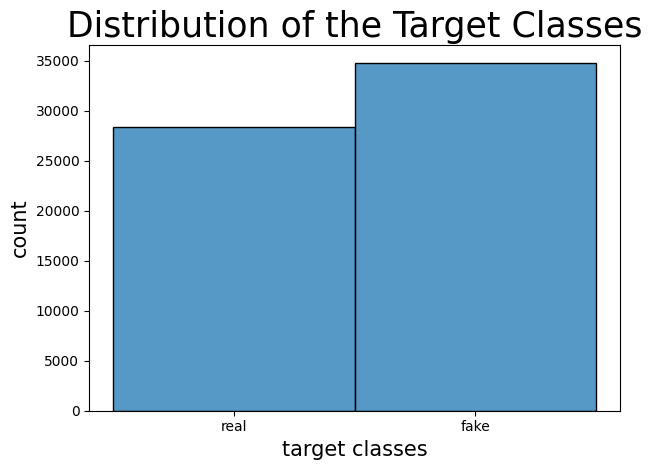

In [11]:
import seaborn as sns

news_map = {1:'real',0:'fake'}
df['label_names'] = df['label'].map(news_map)

sns.histplot(data=df.label_names)
plt.title('Distribution of the Target Classes',fontsize=25)
plt.xlabel('target classes',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.tight_layout()

In [12]:
new_df = df[['title_text','label']].rename(columns={'title_text':'text'})
display(new_df)

,text,label
71361,Donald Trump Responds To Mockery Over Fake Sw...,1
11496,TweetwaveThis time it's true no pantsTweetwave...,1
20292,Rubio says prospect of Trump president is 'wor...,0
38855,Trump lifts Cyber Command status to boost cybe...,0
20416,The 7 Biggest Republican Lies About The Econo...,1
...,...,...
71433,More than half of Britons now want to stay in ...,0
41294,"Bill And Hillary Clinton, Inc.: For Sale At Th...",1
869,"Orlando Gunman Was Shot at Least 8 Times, Auto...",0
16332,The Lethal Gaps in How the Supreme Court Handl...,0


In [13]:
cleaned_df = new_df.copy()
cleaned_df["cleaned_text"] = cleaned_df["text"]
cleaned_df.loc[:, "cleaned_text"] = (
    cleaned_df["cleaned_text"]
    .str.lower()                                    # Convert to lowercase
    .replace(r'http[\w:/\.]+', ' ', regex=True)     # Remove URLs
    .replace(r"[^a-z\s'’]", " ", regex=True)        # Remove everything except lowercase letters, spaces, and apostrophes
    .replace(r'\s\s+', ' ', regex=True)             # Collapse multiple spaces
    .str.strip()                                    # Remove leading/trailing spaces
)
display(cleaned_df["cleaned_text"])

71361    donald trump responds to mockery over fake swe...
11496    tweetwavethis time it's true no pantstweetwave...
20292    rubio says prospect of trump president is 'wor...
38855    trump lifts cyber command status to boost cybe...
20416    the biggest republican lies about the economy ...
                               ...                        
71433    more than half of britons now want to stay in ...
41294    bill and hillary clinton inc for sale at the r...
869      orlando gunman was shot at least times autopsy...
16332    the lethal gaps in how the supreme court handl...
63490    polls show the world overwhelmingly loves pres...
Name: cleaned_text, Length: 63121, dtype: object

In [14]:
import contractions

cleaned_df["cleaned_text"] = cleaned_df["cleaned_text"].apply(
    lambda x: contractions.fix(x) if isinstance(x, str) else x
)
display(cleaned_df["cleaned_text"])

71361    donald trump responds to mockery over fake swe...
11496    tweetwavethis time it is true no pantstweetwav...
20292    rubio says prospect of trump president is 'wor...
38855    trump lifts cyber command status to boost cybe...
20416    the biggest republican lies about the economy ...
                               ...                        
71433    more than half of britons now want to stay in ...
41294    bill and hillary clinton inc for sale at the r...
869      orlando gunman was shot at least times autopsy...
16332    the lethal gaps in how the supreme court handl...
63490    polls show the world overwhelmingly loves pres...
Name: cleaned_text, Length: 63121, dtype: object

In [15]:
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].replace(r"’", "", regex=True)
display(cleaned_df["cleaned_text"])

71361    donald trump responds to mockery over fake swe...
11496    tweetwavethis time it is true no pantstweetwav...
20292    rubio says prospect of trump president is 'wor...
38855    trump lifts cyber command status to boost cybe...
20416    the biggest republican lies about the economy ...
                               ...                        
71433    more than half of britons now want to stay in ...
41294    bill and hillary clinton inc for sale at the r...
869      orlando gunman was shot at least times autopsy...
16332    the lethal gaps in how the supreme court handl...
63490    polls show the world overwhelmingly loves pres...
Name: cleaned_text, Length: 63121, dtype: object

# Apply Lemmatization in Parallel

In [16]:
from joblib import Parallel, delayed
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from spacy.cli import download
import gc

# Download the SpaCy model if not already installed
model_name = "en_core_web_sm"

try:
    nlp = spacy.load(model_name, disable=['parser', 'ner'])
    print(f"Successfully loaded model: {model_name}")
except OSError:
    print(f"Model '{model_name}' not found. Downloading...")
    download(model_name)
    nlp = spacy.load(model_name, disable=['parser', 'ner'])
    print(f"Successfully downloaded and loaded model: {model_name}")

nlp.add_pipe('sentencizer')

stopwords = STOP_WORDS  

# Function to lemmatize a single document
def lemmatize_doc(doc):
    return ' '.join(
        tok.lemma_.lower()
        for tok in doc
        if tok.is_alpha and tok.text.lower() not in stopwords
    )

def chunker(iterable, total_length, chunksize):
    for pos in range(0, total_length, chunksize):
        yield iterable[pos: pos + chunksize]
        
# Flatten a list of lists
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

# Process a chunk of texts in parallel
def process_chunk(texts):
    return [lemmatize_doc(doc) for doc in nlp.pipe(texts, batch_size=20)]

# Main preprocessing function for parallel processing
def preprocess_parallel(texts, chunksize=100):
    with Parallel(n_jobs=-1, backend='multiprocessing', prefer="processes") as executor:
        tasks = (delayed(process_chunk)(chunk) for chunk in chunker(texts, len(texts), chunksize=chunksize))
        result = executor(tasks)
    gc.collect()
    return flatten(result)

Successfully loaded model: en_core_web_sm


In [18]:
display(cleaned_df)

,text,label,cleaned_text
71361,Donald Trump Responds To Mockery Over Fake Sw...,1,donald trump responds to mockery over fake swe...
11496,TweetwaveThis time it's true no pantsTweetwave...,1,tweetwavethis time it is true no pantstweetwav...
20292,Rubio says prospect of Trump president is 'wor...,0,rubio says prospect of trump president is 'wor...
38855,Trump lifts Cyber Command status to boost cybe...,0,trump lifts cyber command status to boost cybe...
20416,The 7 Biggest Republican Lies About The Econo...,1,the biggest republican lies about the economy ...
...,...,...,...
71433,More than half of Britons now want to stay in ...,0,more than half of britons now want to stay in ...
41294,"Bill And Hillary Clinton, Inc.: For Sale At Th...",1,bill and hillary clinton inc for sale at the r...
869,"Orlando Gunman Was Shot at Least 8 Times, Auto...",0,orlando gunman was shot at least times autopsy...
16332,The Lethal Gaps in How the Supreme Court Handl...,0,the lethal gaps in how the supreme court handl...


In [19]:
sampled_df = cleaned_df.sample(frac=0.2, random_state=42)
display(sampled_df)

,text,label,cleaned_text
25171,Zimbabwe's Mugabe to meet military commanders ...,0,zimbabwe's mugabe to meet military commanders ...
47301,Rebuke of Clinton over email use creates openi...,0,rebuke of clinton over email use creates openi...
3513,"Mexico’s Former First Lady Rips Trump Visit, ...",1,mexicos former first lady rips trump visit say...
59421,"Trump Campaigned Against Lobbyists, but Now Th...",0,trump campaigned against lobbyists but now the...
26839,McConnell says U.S. debt ceiling debate could ...,0,mcconnell says you s debt ceiling debate could...
...,...,...,...
69589,Will Clinton’s experience be a liability?Hilla...,0,will clintons experience be a liability hillar...
7551,"Halloween, Instagram Style - The New York Time...",0,halloween instagram style the new york timesla...
15199,Putin and Trump to Potentially Meet in Sloveni...,1,putin and trump to potentially meet in sloveni...
12126,BREAKING: World's Smartest Computer Just Predi...,1,breaking world's smartest computer just predic...


In [22]:
# Split the text into 5 parts
num_parts = 5
split_texts = np.array_split(cleaned_df['cleaned_text'], num_parts)
display(split_texts)
# Process each part iteratively
lemmatized_parts = []
for number, part in enumerate(split_texts):
    print(f"Processing part {number + 1}/{num_parts}...")
    lemmatized_part = preprocess_parallel(part.tolist(), chunksize=1000)
    lemmatized_parts.extend(lemmatized_part)

# Combine the lemmatized parts back together
cleaned_df['lemmatized_text'] = lemmatized_parts
display(cleaned_df['lemmatized_text'])

/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


[71361    donald trump responds to mockery over fake swe...
 11496    tweetwavethis time it is true no pantstweetwav...
 20292    rubio says prospect of trump president is 'wor...
 38855    trump lifts cyber command status to boost cybe...
 20416    the biggest republican lies about the economy ...
                                ...                        
 53863    sex objects for hillary jennifer lopez shakes ...
 25896    'disastrous' conditions for migrants displaced...
 53034    trump fans scream that john mccain should die ...
 15627    zimbabweans in south africa hope for change at...
 50250    colombian president says he left firm listed i...
 Name: cleaned_text, Length: 12625, dtype: object,
 64908    raccoons in central park draw crowds and warni...
 37673    merkel has no doubts uk eu will achieve good b...
 39258    chorus grows for clintons to shutter charitabl...
 1887     john mccain just savaged trump on twitter twee...
 65562    isis takes out m a abrams tank with ame

Processing part 1/5...
Processing part 2/5...
Processing part 3/5...
Processing part 4/5...
Processing part 5/5...


71361    donald trump respond mockery fake swedish atta...
11496    tweetwavethis time true pantstweetwave anthony...
20292    rubio say prospect trump president worrisome r...
38855    trump lifts cyber command status boost cyber d...
20416    big republican lie economy tear apart minute v...
                               ...                        
71433    half briton want stay eu polledinburgh reuters...
41294    bill hillary clinton inc sale right pricein sp...
869      orlando gunman shoot time autopsy find new yor...
16332    lethal gap supreme court handle death penalty ...
63490    poll world overwhelmingly love president obama...
Name: lemmatized_text, Length: 63121, dtype: object

In [23]:
display(cleaned_df)

,text,label,cleaned_text,lemmatized_text
71361,Donald Trump Responds To Mockery Over Fake Sw...,1,donald trump responds to mockery over fake swe...,donald trump respond mockery fake swedish atta...
11496,TweetwaveThis time it's true no pantsTweetwave...,1,tweetwavethis time it is true no pantstweetwav...,tweetwavethis time true pantstweetwave anthony...
20292,Rubio says prospect of Trump president is 'wor...,0,rubio says prospect of trump president is 'wor...,rubio say prospect trump president worrisome r...
38855,Trump lifts Cyber Command status to boost cybe...,0,trump lifts cyber command status to boost cybe...,trump lifts cyber command status boost cyber d...
20416,The 7 Biggest Republican Lies About The Econo...,1,the biggest republican lies about the economy ...,big republican lie economy tear apart minute v...
...,...,...,...,...
71433,More than half of Britons now want to stay in ...,0,more than half of britons now want to stay in ...,half briton want stay eu polledinburgh reuters...
41294,"Bill And Hillary Clinton, Inc.: For Sale At Th...",1,bill and hillary clinton inc for sale at the r...,bill hillary clinton inc sale right pricein sp...
869,"Orlando Gunman Was Shot at Least 8 Times, Auto...",0,orlando gunman was shot at least times autopsy...,orlando gunman shoot time autopsy find new yor...
16332,The Lethal Gaps in How the Supreme Court Handl...,0,the lethal gaps in how the supreme court handl...,lethal gap supreme court handle death penalty ...


In [24]:
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'n‘t', 'once', 'of', "n't", 'becomes', 'unless', 'where', "'re", 'otherwise', 'another', 'through', 'very', 'via', 'itself', 'should', 'various', 'among', 'wherein', 'empty', 'yourself', 'call', 'six', 'are', 'namely', '’s', 'does', 'whereby', 'yourselves', 'anyone', 'out', 'same', 'hers', 'sometimes', 'can', 'have', 'part', 'one', 'twenty', 'were', 'when', 'latter', 'became', 'many', 'whence', 'latterly', 'side', 'might', 'full', 'quite', 'was', 'often', 'whom', '’ve', 'an', 'again', 'say', '‘ve', 'who', 'give', 'thru', 'mine', '’d', 'being', 'well', 'his', 'moreover', 'nine', 'in', "'ve", 'by', 'than', 'her', 'rather', 'everything', 'more', 'third', 'therefore', 'noone', 'bottom', 'next', "'ll", 'over', 'afterwards', 'enough', 'due', 'a', "'s", 'is', 'per', 'see', 'so', 'someone', 'hereupon', 'now', 'just', 'several', '‘m', 'whoever', 'therein', '‘re', 'though', 'regarding', 'had', 'name', 'anyhow', 'any', 'it', 're', 'across', 'hereby', 'on', 'also', 'amongst', 'doing', 'whenever',

In [25]:
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    return ' '.join(filtered_tokens)

cleaned_df['preprocessed_text'] = cleaned_df['lemmatized_text'].apply(remove_stopwords)
display(cleaned_df["preprocessed_text"])

71361    donald trump respond mockery fake swedish atta...
11496    tweetwavethis time true pantstweetwave anthony...
20292    rubio prospect trump president worrisome reute...
38855    trump lifts cyber command status boost cyber d...
20416    big republican lie economy tear apart minute v...
                               ...                        
71433    half briton want stay eu polledinburgh reuters...
41294    bill hillary clinton inc sale right pricein sp...
869      orlando gunman shoot time autopsy find new yor...
16332    lethal gap supreme court handle death penalty ...
63490    poll world overwhelmingly love president obama...
Name: preprocessed_text, Length: 63121, dtype: object

In [26]:
display(cleaned_df)

,text,label,cleaned_text,lemmatized_text,preprocessed_text
71361,Donald Trump Responds To Mockery Over Fake Sw...,1,donald trump responds to mockery over fake swe...,donald trump respond mockery fake swedish atta...,donald trump respond mockery fake swedish atta...
11496,TweetwaveThis time it's true no pantsTweetwave...,1,tweetwavethis time it is true no pantstweetwav...,tweetwavethis time true pantstweetwave anthony...,tweetwavethis time true pantstweetwave anthony...
20292,Rubio says prospect of Trump president is 'wor...,0,rubio says prospect of trump president is 'wor...,rubio say prospect trump president worrisome r...,rubio prospect trump president worrisome reute...
38855,Trump lifts Cyber Command status to boost cybe...,0,trump lifts cyber command status to boost cybe...,trump lifts cyber command status boost cyber d...,trump lifts cyber command status boost cyber d...
20416,The 7 Biggest Republican Lies About The Econo...,1,the biggest republican lies about the economy ...,big republican lie economy tear apart minute v...,big republican lie economy tear apart minute v...
...,...,...,...,...,...
71433,More than half of Britons now want to stay in ...,0,more than half of britons now want to stay in ...,half briton want stay eu polledinburgh reuters...,half briton want stay eu polledinburgh reuters...
41294,"Bill And Hillary Clinton, Inc.: For Sale At Th...",1,bill and hillary clinton inc for sale at the r...,bill hillary clinton inc sale right pricein sp...,bill hillary clinton inc sale right pricein sp...
869,"Orlando Gunman Was Shot at Least 8 Times, Auto...",0,orlando gunman was shot at least times autopsy...,orlando gunman shoot time autopsy find new yor...,orlando gunman shoot time autopsy find new yor...
16332,The Lethal Gaps in How the Supreme Court Handl...,0,the lethal gaps in how the supreme court handl...,lethal gap supreme court handle death penalty ...,lethal gap supreme court handle death penalty ...


In [28]:
from custom_utils import save_dataframe_as_parquet

final_df = cleaned_df[['preprocessed_text','label']]
display(final_df)

save_dataframe_as_parquet(final_df, folder_path='data', folder_name='preprocessed_big_training_df')


,preprocessed_text,label
71361,donald trump respond mockery fake swedish atta...,1
11496,tweetwavethis time true pantstweetwave anthony...,1
20292,rubio prospect trump president worrisome reute...,0
38855,trump lifts cyber command status boost cyber d...,0
20416,big republican lie economy tear apart minute v...,1
...,...,...
71433,half briton want stay eu polledinburgh reuters...,0
41294,bill hillary clinton inc sale right pricein sp...,1
869,orlando gunman shoot time autopsy find new yor...,0
16332,lethal gap supreme court handle death penalty ...,0


Dataframe saved in 2 files under the folder: data/preprocessed_big_training_df


'data/preprocessed_big_training_df'